In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [17]:
# Set the number of threads to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "4"


In [18]:
# Load the dataset
file_path = 'multifeature_power_theft_detection.csv'
data = pd.read_csv(file_path)


In [19]:
# Assigning default column names since the dataset lacks proper headers
data.columns = ['ID', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Label']


In [20]:
# Dropping 'ID' and 'Label' columns since they are not used in unsupervised learning (K-Means)
data_for_clustering = data.drop(columns=['ID', 'Label'])


In [21]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)  # Set n_init explicitly
kmeans.fit(data_for_clustering)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [22]:
# Adding the predicted cluster labels to the original data
data['Cluster'] = kmeans.labels_


In [23]:
# Calculate distances from each point to its cluster center
data['Distance'] = kmeans.transform(data_for_clustering).min(axis=1)


In [24]:
# Define a threshold for identifying anomalies (mean + 2 * std)
threshold = data['Distance'].mean() + 2 * data['Distance'].std()


In [25]:
# Mark anomalies
data['Anomaly'] = data['Distance'] > threshold

In [26]:
# Display the first few rows of the updated dataset
print(data.head())

   ID   Feature_1   Feature_2  Feature_3  Feature_4  Feature_5  Label  \
0   2  493.086785  234.386811   2.124084  30.999052         18      1   
1   3  532.384427  228.895179   2.277305  31.320100         10      5   
2   4  576.151493  230.134429   2.434562  36.361767         11      7   
3   5  488.292331  231.041914   2.082100  33.662461          8      2   
4   6  488.293152  219.791326   2.264741  31.443618          1      1   

   Cluster   Distance  Anomaly  
0        0  10.884803    False  
1        0  31.710799    False  
2        0  75.655905    False  
3        0  13.543461    False  
4        0  19.506852    False  


In [27]:
# Plotting the results
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

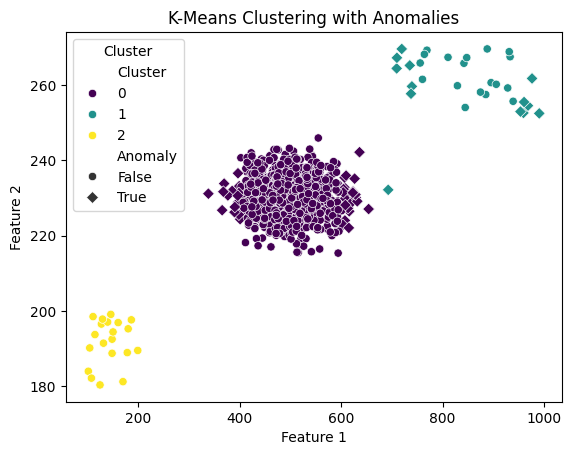

In [28]:
# Use different markers based on the anomaly status
sns.scatterplot(data=data, x='Feature_1', y='Feature_2', hue='Cluster', palette='viridis', 
                style='Anomaly', markers={False: 'o', True: 'D'})
plt.title('K-Means Clustering with Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [29]:
# Display anomalies
anomalies = data[data['Anomaly']]
print("Identified Anomalies:")
print(anomalies)

Identified Anomalies:
      ID   Feature_1   Feature_2  Feature_3  Feature_4  Feature_5  Label  \
73    75  369.012745  233.858494   1.545026  28.557257          7      7   
78    80  400.621554  224.401650   1.829007  31.021945         20      2   
112  114  623.162106  231.732442   2.704169  33.798561         18      5   
124  126  609.522781  231.087164   2.693903  35.353053          4      2   
178  180  636.008458  242.198762   2.610092  30.547042         15      1   
208  210  692.636575  232.202374   2.969568  34.468488          1      2   
219  221  615.732928  226.490042   2.686513  28.138405         20      6   
233  235  607.197204  224.062008   2.754068  38.336121         18      1   
235  237  398.742871  233.168884   1.686601  33.678110         18      4   
251  253  606.107810  232.844915   2.568822  27.910452         20      3   
261  263  337.936633  231.168930   1.467155  30.062497         12      7   
283  285  606.651669  235.456551   2.638280  25.476928         22 